In [1]:
import pandas as pd

df_Abstract = pd.read_csv('final-dataset(A1-31306samples)-train-topicmodel.csv')
df_Abstract.head()

,publication_number,country_code,kind_code,title,abstract,claims,publication_date,ipc_code,cpc_code,first_claim,claim_lengths,sub_classes,sub_class,abstract_lengths
0,US2020097067A1,US,A1,Artificial Intelligence System and Interactive...,"A reality interactive responding system, compr...","1 . A reality interactive responding system, c...",20200326,G06F9/448,G16H40/67,"1 . A reality interactive responding system, c...",200,"['G06F9/448', 'G16H40/67']","['G06F', 'G16H']",123
1,US2020098473A1,US,A1,Data Storage and Retrieval System for Non-Cont...,A web-based interface enables medical personne...,What is claimed is: \n \n 1 . A da...,20200326,G16H40/67,H04L67/1097,What is claimed is: 1 . A data storage and ret...,200,"['G16H40/67', 'H04L67/1097']","['G16H', 'H04L']",142
2,US2020098451A1,US,A1,Hybrid analysis framework for prediction of ou...,A facility for predicting patient outcomes on ...,"1 . A method in a computing system, comprising...",20200326,G16H10/20,G16H10/20,"1 . A method in a computing system, comprising...",200,"['G16H10/20', 'G16H10/20']","['G16H', 'G16H']",81
3,US2020098458A1,US,A1,Medical cannabis platform with physician and p...,"Through a physician&#39;s portal, a platform c...",What is claimed is: \n \n 1 . A me...,20200326,G16H80/00,A61K36/185,What is claimed is: 1 . A method for providing...,200,"['G16H80/00', 'A61K36/185']","['G16H', 'A61K']",148
4,US2020093988A1,US,A1,Patient day planning systems and methods,"Infusion systems, infusion devices, and relate...",What is claimed is: \n \n 1 . A me...,20200326,G16H20/17,A61M2230/201,What is claimed is: 1 . A method of monitoring...,200,"['G16H20/17', 'A61M2230/201']","['G16H', 'A61M']",110


In [2]:
len(df_Abstract)

31306

# preprocessing

In [3]:
def cleantext(df_Abstract): 
    
    df_Abstract['cleaned_Abstract_text'] = df_Abstract['abstract'].replace(r'\'|\"|\,|\.|\?|\+|\-|\/|\=|\(|\)|\n|"', '', regex=True)
    
    # convert to lowercase
    df_Abstract['cleaned_Abstract_text'] = df_Abstract['cleaned_Abstract_text'].str.lower()
    
    #remove numbers
    df_Abstract['cleaned_Abstract_text'] =df_Abstract['cleaned_Abstract_text'].replace(r'\d+', '', regex = True)
        
    #remove_symbols
    df_Abstract['cleaned_Abstract_text']  = df_Abstract['cleaned_Abstract_text'].replace(r'[^a-zA-Z0-9]', " ", regex=True)
    
    #remove punctuations 
    df_Abstract['cleaned_Abstract_text'] = df_Abstract['cleaned_Abstract_text'].replace(r'[[]!"#$%\'()\*+,-./:;<=>?^_`{|}]+',"", regex = True)
    
    #remove_URL(x):
    df_Abstract['cleaned_Abstract_text']  = df_Abstract['cleaned_Abstract_text'].replace(r'https.*$', "", regex = True)
    df_Abstract['cleaned_Abstract_text'] = df_Abstract['cleaned_Abstract_text'].replace("   ", " ", regex = True)
    df_Abstract['cleaned_Abstract_text'] = df_Abstract['cleaned_Abstract_text'].replace("  ", " ", regex = True)
   
    return df_Abstract

df_Abstract = cleantext(df_Abstract)
df_Abstract.head()

C:\Users\admin\anaconda3\Lib\site-packages\pandas\core\dtypes\inference.py:181: FutureWarning: Possible nested set at position 1
  re.compile(obj)


,publication_number,country_code,kind_code,title,abstract,claims,publication_date,ipc_code,cpc_code,first_claim,claim_lengths,sub_classes,sub_class,abstract_lengths,cleaned_Abstract_text
0,US2020097067A1,US,A1,Artificial Intelligence System and Interactive...,"A reality interactive responding system, compr...","1 . A reality interactive responding system, c...",20200326,G06F9/448,G16H40/67,"1 . A reality interactive responding system, c...",200,"['G06F9/448', 'G16H40/67']","['G06F', 'G16H']",123,a reality interactive responding system compri...
1,US2020098473A1,US,A1,Data Storage and Retrieval System for Non-Cont...,A web-based interface enables medical personne...,What is claimed is: \n \n 1 . A da...,20200326,G16H40/67,H04L67/1097,What is claimed is: 1 . A data storage and ret...,200,"['G16H40/67', 'H04L67/1097']","['G16H', 'H04L']",142,a webbased interface enables medical personnel...
2,US2020098451A1,US,A1,Hybrid analysis framework for prediction of ou...,A facility for predicting patient outcomes on ...,"1 . A method in a computing system, comprising...",20200326,G16H10/20,G16H10/20,"1 . A method in a computing system, comprising...",200,"['G16H10/20', 'G16H10/20']","['G16H', 'G16H']",81,a facility for predicting patient outcomes on ...
3,US2020098458A1,US,A1,Medical cannabis platform with physician and p...,"Through a physician&#39;s portal, a platform c...",What is claimed is: \n \n 1 . A me...,20200326,G16H80/00,A61K36/185,What is claimed is: 1 . A method for providing...,200,"['G16H80/00', 'A61K36/185']","['G16H', 'A61K']",148,through a physician s portal a platform calcul...
4,US2020093988A1,US,A1,Patient day planning systems and methods,"Infusion systems, infusion devices, and relate...",What is claimed is: \n \n 1 . A me...,20200326,G16H20/17,A61M2230/201,What is claimed is: 1 . A method of monitoring...,200,"['G16H20/17', 'A61M2230/201']","['G16H', 'A61M']",110,infusion systems infusion devices and related ...


In [4]:
import nltk
from nltk.corpus import stopwords

# Load the stop words
nltk.download('stopwords')
english_stop_words = set(stopwords.words('english'))

# Define a set of patent-specific stop words 337
patent_stop_words = set([
                        'a', 'an', 'the', 'is', 'are', 'was', 'were', 'will', 'shall', 'may', 'can', 'could',
                        'of', 'in', 'on', 'at', 'by', 'with', 'for', 'to', 'from', 'as', 'and', 'or', 'not',
                        'this', 'that', 'these', 'those', 'such', 'which', 'where', 'when', 'who', 'whom',
                        'what', 'how', 'why', 'be', 'have', 'has', 'having', 'had', 'do', 'does', 'doing',
                        'done', 'but', 'however', 'although', 'unless', 'until', 'since', 'while', 'before',
                        'after', 'during', 'through', 'over', 'under', 'above', 'below', 'between', 'among',
                        'within', 'without', 'against', 'via', 'via', 'due', 'onto', 'per', 'each', 'any',
                        'some', 'many', 'few', 'all', 'most', 'no', 'yes', 'ok', 'okk', 'nope', 'nopes', 'nay',
                        'more', 'less', 'least', 'other', 'another', 'somehow', 'thus', 'therefore',
                        'otherwise', 'instead', 'again', 'further', 'furthermore', 'also', 'besides', 'moreover',
                        'hence', 'thus', 'therefore', 'accordingly', 'consequently', 'so', 'then', 'thereby',
                        'otherwise', 'instead', 'again', 'further', 'furthermore', 'also', 'besides', 'moreover',
                        'hence', 'thus', 'therefore', 'accordingly', 'consequently', 'so', 'then', 'thereby',
                        'therein', 'thereupon', 'therewith', 'thereto', 'wherefore', 'forthwith', 'hereby',
                        'herein', 'hereupon', 'herewith', 'hereto', 'whereupon', 'aforesaid', 'heretofore',
                        'herewith', 'hereto', 'whereupon', 'aforesaid', 'heretofore', 'therefrom', 'thereof',
                        'therein', 'thereon', 'thereto', 'whereby', 'thereafter', 'hereafter', 'whenever',
                        'wherever', 'until', 'since', 'whenever', 'wherever', 'until', 'since', 'whereas', 'whilst',
                        'whereas', 'whilst', 'beside', 'beyond', 'during', 'about', 'around', 'above', 'below', 'before',
                        'after', 'without', 'within', 'between', 'among', 'against', 'under', 'over', 'through',
                        'into', 'onto', 'upon', 'am', 'are', 'is', 'was', 'were', 'be', 'been', 'being', 'have', 'has',
                        'had', 'having', 'do', 'does', 'did', 'doing', 'can', 'could', 'will', 'would', 'shall', 'should',
                        'may', 'might', 'must', 'ought', 'need', 'dare', 'used', 'use', 'using', 'uses', 'used', 'put',
                        'puts', 'putting', 'tell', 'tells', 'told', 'telling', 'ask', 'asks', 'asked', 'asking',
                        'make', 'makes', 'made', 'making', 'find', 'finds', 'found', 'finding', 'keep', 'keeps',
                        'kept', 'keeping', 'begin', 'begins', 'began', 'beginning', 'show', 'shows', 'showed',
                        'showing', 'say', 'says', 'said', 'saying', 'says', 'said', 'let', 'lets', 'letting', 'make',
                        'makes', 'made', 'making', 'put', 'puts', 'putting', 'seem', 'seems', 'seemed', 'seeming',
                        'need', 'needs', 'needed', 'needing', 'become', 'becomes', 'became', 'bec'])


# Merge the sets of stop words
stop_words = english_stop_words.union(patent_stop_words)

df_Abstract['cleaned_Abstract_without_Stopwprd'] = df_Abstract['cleaned_Abstract_text'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in stop_words]))
df_Abstract.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,publication_number,country_code,kind_code,title,abstract,claims,publication_date,ipc_code,cpc_code,first_claim,claim_lengths,sub_classes,sub_class,abstract_lengths,cleaned_Abstract_text,cleaned_Abstract_without_Stopwprd
0,US2020097067A1,US,A1,Artificial Intelligence System and Interactive...,"A reality interactive responding system, compr...","1 . A reality interactive responding system, c...",20200326,G06F9/448,G16H40/67,"1 . A reality interactive responding system, c...",200,"['G06F9/448', 'G16H40/67']","['G06F', 'G16H']",123,a reality interactive responding system compri...,reality interactive responding system comprisi...
1,US2020098473A1,US,A1,Data Storage and Retrieval System for Non-Cont...,A web-based interface enables medical personne...,What is claimed is: \n \n 1 . A da...,20200326,G16H40/67,H04L67/1097,What is claimed is: 1 . A data storage and ret...,200,"['G16H40/67', 'H04L67/1097']","['G16H', 'H04L']",142,a webbased interface enables medical personnel...,webbased interface enables medical personnel r...
2,US2020098451A1,US,A1,Hybrid analysis framework for prediction of ou...,A facility for predicting patient outcomes on ...,"1 . A method in a computing system, comprising...",20200326,G16H10/20,G16H10/20,"1 . A method in a computing system, comprising...",200,"['G16H10/20', 'G16H10/20']","['G16H', 'G16H']",81,a facility for predicting patient outcomes on ...,facility predicting patient outcomes basis cli...
3,US2020098458A1,US,A1,Medical cannabis platform with physician and p...,"Through a physician&#39;s portal, a platform c...",What is claimed is: \n \n 1 . A me...,20200326,G16H80/00,A61K36/185,What is claimed is: 1 . A method for providing...,200,"['G16H80/00', 'A61K36/185']","['G16H', 'A61K']",148,through a physician s portal a platform calcul...,physician portal platform calculates efficacy ...
4,US2020093988A1,US,A1,Patient day planning systems and methods,"Infusion systems, infusion devices, and relate...",What is claimed is: \n \n 1 . A me...,20200326,G16H20/17,A61M2230/201,What is claimed is: 1 . A method of monitoring...,200,"['G16H20/17', 'A61M2230/201']","['G16H', 'A61M']",110,infusion systems infusion devices and related ...,infusion systems infusion devices related pati...


In [5]:
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])
df_Abstract["Lemmatized-Abstract"] = df_Abstract["cleaned_Abstract_without_Stopwprd"].apply(lambda text: lemmatize_words(text))
df_Abstract.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,publication_number,country_code,kind_code,title,abstract,claims,publication_date,ipc_code,cpc_code,first_claim,claim_lengths,sub_classes,sub_class,abstract_lengths,cleaned_Abstract_text,cleaned_Abstract_without_Stopwprd,Lemmatized-Abstract
0,US2020097067A1,US,A1,Artificial Intelligence System and Interactive...,"A reality interactive responding system, compr...","1 . A reality interactive responding system, c...",20200326,G06F9/448,G16H40/67,"1 . A reality interactive responding system, c...",200,"['G06F9/448', 'G16H40/67']","['G06F', 'G16H']",123,a reality interactive responding system compri...,reality interactive responding system comprisi...,reality interactive responding system comprisi...
1,US2020098473A1,US,A1,Data Storage and Retrieval System for Non-Cont...,A web-based interface enables medical personne...,What is claimed is: \n \n 1 . A da...,20200326,G16H40/67,H04L67/1097,What is claimed is: 1 . A data storage and ret...,200,"['G16H40/67', 'H04L67/1097']","['G16H', 'H04L']",142,a webbased interface enables medical personnel...,webbased interface enables medical personnel r...,webbased interface enables medical personnel r...
2,US2020098451A1,US,A1,Hybrid analysis framework for prediction of ou...,A facility for predicting patient outcomes on ...,"1 . A method in a computing system, comprising...",20200326,G16H10/20,G16H10/20,"1 . A method in a computing system, comprising...",200,"['G16H10/20', 'G16H10/20']","['G16H', 'G16H']",81,a facility for predicting patient outcomes on ...,facility predicting patient outcomes basis cli...,facility predicting patient outcome basis clin...
3,US2020098458A1,US,A1,Medical cannabis platform with physician and p...,"Through a physician&#39;s portal, a platform c...",What is claimed is: \n \n 1 . A me...,20200326,G16H80/00,A61K36/185,What is claimed is: 1 . A method for providing...,200,"['G16H80/00', 'A61K36/185']","['G16H', 'A61K']",148,through a physician s portal a platform calcul...,physician portal platform calculates efficacy ...,physician portal platform calculates efficacy ...
4,US2020093988A1,US,A1,Patient day planning systems and methods,"Infusion systems, infusion devices, and relate...",What is claimed is: \n \n 1 . A me...,20200326,G16H20/17,A61M2230/201,What is claimed is: 1 . A method of monitoring...,200,"['G16H20/17', 'A61M2230/201']","['G16H', 'A61M']",110,infusion systems infusion devices and related ...,infusion systems infusion devices related pati...,infusion system infusion device related patien...


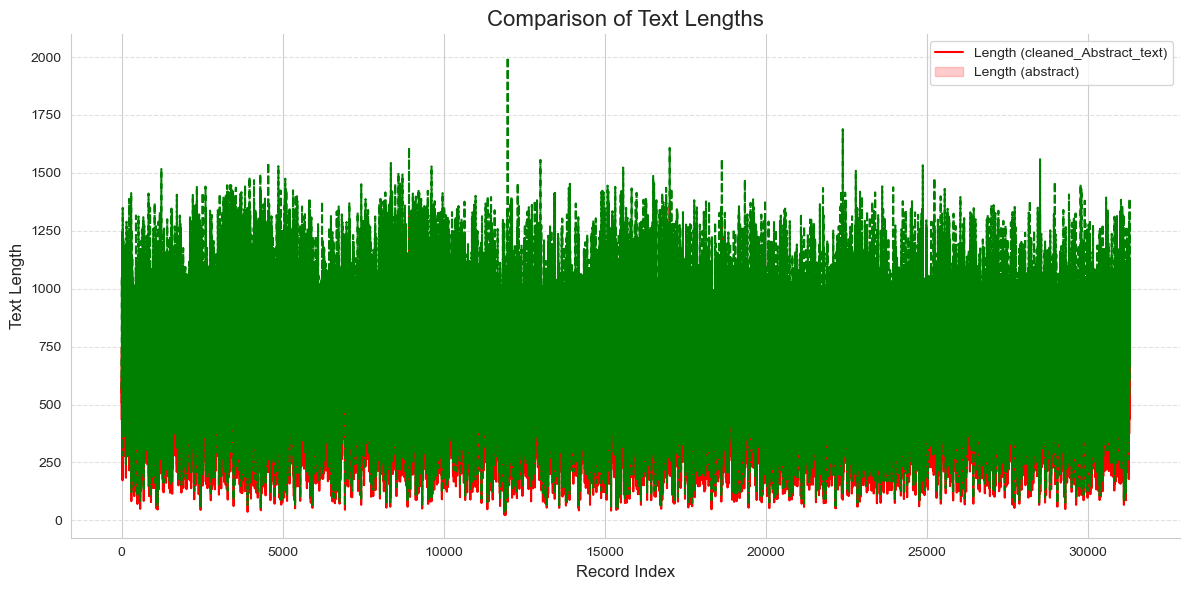

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have a DataFrame df with 'cleaned_Abstract_text' and 'abstract' columns

# Calculate the length of each record in both columns
df_Abstract['Length (cleaned)'] = df_Abstract['Lemmatized-Abstract'].str.len()
df_Abstract['Length (original)'] = df_Abstract['abstract'].str.len()

# Set a custom Seaborn style for a more appealing plot
sns.set_style("whitegrid")

# Create a figure with subplots for better readability
fig, ax = plt.subplots(figsize=(12, 6))

# Create line plots for both text lengths
sns.lineplot(data=df_Abstract[['Length (cleaned)', 'Length (original)']], ax=ax, palette=["red", "green"])
ax.set_xlabel('Record Index', fontsize=12)
ax.set_ylabel('Text Length', fontsize=12)
ax.set_title('Comparison of Text Lengths', fontsize=16)

# Customize the legend
ax.legend(['Length (cleaned_Abstract_text)', 'Length (abstract)'], fontsize=10)

# Add a grid to the plot
sns.despine()
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Display the plot
plt.tight_layout()
plt.show()

In [7]:
df_Abstract.head()

,publication_number,country_code,kind_code,title,abstract,claims,publication_date,ipc_code,cpc_code,first_claim,claim_lengths,sub_classes,sub_class,abstract_lengths,cleaned_Abstract_text,cleaned_Abstract_without_Stopwprd,Lemmatized-Abstract,Length (cleaned),Length (original)
0,US2020097067A1,US,A1,Artificial Intelligence System and Interactive...,"A reality interactive responding system, compr...","1 . A reality interactive responding system, c...",20200326,G06F9/448,G16H40/67,"1 . A reality interactive responding system, c...",200,"['G06F9/448', 'G16H40/67']","['G06F', 'G16H']",123,a reality interactive responding system compri...,reality interactive responding system comprisi...,reality interactive responding system comprisi...,506,699
1,US2020098473A1,US,A1,Data Storage and Retrieval System for Non-Cont...,A web-based interface enables medical personne...,What is claimed is: \n \n 1 . A da...,20200326,G16H40/67,H04L67/1097,What is claimed is: 1 . A data storage and ret...,200,"['G16H40/67', 'H04L67/1097']","['G16H', 'H04L']",142,a webbased interface enables medical personnel...,webbased interface enables medical personnel r...,webbased interface enables medical personnel r...,601,881
2,US2020098451A1,US,A1,Hybrid analysis framework for prediction of ou...,A facility for predicting patient outcomes on ...,"1 . A method in a computing system, comprising...",20200326,G16H10/20,G16H10/20,"1 . A method in a computing system, comprising...",200,"['G16H10/20', 'G16H10/20']","['G16H', 'G16H']",81,a facility for predicting patient outcomes on ...,facility predicting patient outcomes basis cli...,facility predicting patient outcome basis clin...,434,560
3,US2020098458A1,US,A1,Medical cannabis platform with physician and p...,"Through a physician&#39;s portal, a platform c...",What is claimed is: \n \n 1 . A me...,20200326,G16H80/00,A61K36/185,What is claimed is: 1 . A method for providing...,200,"['G16H80/00', 'A61K36/185']","['G16H', 'A61K']",148,through a physician s portal a platform calcul...,physician portal platform calculates efficacy ...,physician portal platform calculates efficacy ...,748,1051
4,US2020093988A1,US,A1,Patient day planning systems and methods,"Infusion systems, infusion devices, and relate...",What is claimed is: \n \n 1 . A me...,20200326,G16H20/17,A61M2230/201,What is claimed is: 1 . A method of monitoring...,200,"['G16H20/17', 'A61M2230/201']","['G16H', 'A61M']",110,infusion systems infusion devices and related ...,infusion systems infusion devices related pati...,infusion system infusion device related patien...,590,737


In [8]:
first_record = df_Abstract['Lemmatized-Abstract'][1]
first_record

'webbased interface enables medical personnel remotely monitor medical device monitoring system record operational data alarm medical device file network connection medical device monitoring system intermittent file contain contiguous stream data medical device file pause recording gap network connectivity system display current data well list alarm medical personnel wish view detail earlier time one alarm system calculates file medical device data recorded calculation account discontiguous nature data system time network connection broken calculate index file corresponds time userselected alarm'

In [9]:
x = len(df_Abstract['Lemmatized-Abstract'][1])
print(x)

601


In [10]:
!pip install sentence-transformers

In [11]:
import torch
from bertopic import BERTopic
from hdbscan import HDBSCAN
from umap import UMAP
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer
from sentence_transformers import SentenceTransformer


# Load the Sentence Transformers model
#sentence_model = SentenceTransformer('AI-Growth-Lab/PatentSBERTa')
#sentence_model = SentenceTransformer("all-MiniLM-L6-v2", device=device)
sentence_model = SentenceTransformer("xlm-r-bert-base-nli-stsb-mean-tokens")



# Adjust UMAP hyperparameters
umap_model = UMAP(n_neighbors=3, 
                  n_components=3, 
                  min_dist=0.05, 
                  metric='cosine', 
                  random_state=100)  # Utilize all available CPU cores for UMAP preprocessing

# Adjust HDBSCAN hyperparameters
hdbscan_model = HDBSCAN( min_cluster_size=80,
                        min_samples=40, 
                        metric='euclidean', 
                        cluster_selection_method='eom', 
                        prediction_data=True)

# Adjust CountVectorizer hyperparameters
vectorizer_model = CountVectorizer(ngram_range=(1, 3))


# c-TF-IDF
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)

# Run Model
topic_model = BERTopic(umap_model=umap_model,
                       embedding_model=sentence_model, 
                       hdbscan_model=hdbscan_model, 
                       vectorizer_model=vectorizer_model,
                       ctfidf_model=ctfidf_model,
                       verbose=True)

# Replace 'df['first_claim']' with your data source for the first_claim column
topics, probabilities = topic_model.fit_transform(df_Abstract['Lemmatized-Abstract'])


Batches:   0%|          | 0/979 [00:00<?, ?it/s]

2023-10-03 20:06:23,871 - BERTopic - Transformed documents to Embeddings
2023-10-03 20:06:47,908 - BERTopic - Reduced dimensionality
2023-10-03 20:06:49,656 - BERTopic - Clustered reduced embeddings


In [12]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

documents = pd.DataFrame({"Document": df_Abstract['Lemmatized-Abstract'],
                          "ID": range(len(df_Abstract['Lemmatized-Abstract'])),
                          "Topic": topics})

documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] for topic in range(len(set(topics))-1)]


# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='c_npmi')
coherence_c_nmpi = coherence_model.get_coherence()
print("c_npmi is: ",coherence_c_nmpi)

c_npmi is:  -0.037301606521504584


In [13]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

documents = pd.DataFrame({"Document":df_Abstract['Lemmatized-Abstract'],
                          "ID": range(len(df_Abstract['Lemmatized-Abstract'])),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='c_v')
coherence_CV= coherence_model.get_coherence()
print("C_V is: ", coherence_CV)

C_V is:  0.45713186531563016


In [14]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

documents = pd.DataFrame({"Document":df_Abstract['Lemmatized-Abstract'],
                          "ID": range(len(df_Abstract['Lemmatized-Abstract'])),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='u_mass')
coherence_u_mass= coherence_model.get_coherence()
print("u_mass is: ", coherence_u_mass)

u_mass is:  -0.6301416632334653


In [15]:
 topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,9669,-1_system_device_user_one,"[system, device, user, one, method, data, info...",[one implementation apparatus estimate body co...
1,0,7000,0_medical_patient_medical image_healthcare,"[medical, patient, medical image, healthcare, ...",[computerimplemented method system managing pa...
2,1,1968,1_user_first_data_second,"[user, first, data, second, processor, one, in...",[computer system adaptive parsing processing t...
3,2,1501,2_drug_medication_prescription_pharmacy,"[drug, medication, prescription, pharmacy, pha...",[disclosed system method processing releasing ...
4,3,1492,3_pressure_blood_heart_cardiac,"[pressure, blood, heart, cardiac, flow, fluid,...",[embodiment analyte detection system includes ...
5,4,877,4_wireless_mobile_communication_device,"[wireless, mobile, communication, device, mobi...",[method device provide wireless communication ...
6,5,637,5_food_nutritional_meal_diet,"[food, nutritional, meal, diet, nutrient, diet...",[novel system methodology dietary medical trea...
7,6,636,6_image_image data_unit_imaging,"[image, image data, unit, imaging, object, dis...",[information processing system comprises image...
8,7,541,7_health_health data_health care_health inform...,"[health, health data, health care, health info...",[userspecific medical genetic fitness environm...
9,8,530,8_glucose_insulin_blood glucose_blood,"[glucose, insulin, blood glucose, blood, gluco...",[invention discloses method calculating insuli...


In [16]:
#adding topics and probs for eachdoc in dataset
df_Abstract['topics'] = topics
df_Abstract['prob'] = probabilities
df_Abstract_topic=df_Abstract[["publication_number","title","abstract", "Lemmatized-Abstract","sub_classes","sub_class","topics","prob"]]
df_Abstract_topic

,publication_number,title,abstract,Lemmatized-Abstract,sub_classes,sub_class,topics,prob
0,US2020097067A1,Artificial Intelligence System and Interactive...,"A reality interactive responding system, compr...",reality interactive responding system comprisi...,"['G06F9/448', 'G16H40/67']","['G06F', 'G16H']",1,1.000000
1,US2020098473A1,Data Storage and Retrieval System for Non-Cont...,A web-based interface enables medical personne...,webbased interface enables medical personnel r...,"['G16H40/67', 'H04L67/1097']","['G16H', 'H04L']",0,0.907107
2,US2020098451A1,Hybrid analysis framework for prediction of ou...,A facility for predicting patient outcomes on ...,facility predicting patient outcome basis clin...,"['G16H10/20', 'G16H10/20']","['G16H', 'G16H']",0,1.000000
3,US2020098458A1,Medical cannabis platform with physician and p...,"Through a physician&#39;s portal, a platform c...",physician portal platform calculates efficacy ...,"['G16H80/00', 'A61K36/185']","['G16H', 'A61K']",4,0.571649
4,US2020093988A1,Patient day planning systems and methods,"Infusion systems, infusion devices, and relate...",infusion system infusion device related patien...,"['G16H20/17', 'A61M2230/201']","['G16H', 'A61M']",-1,0.000000
...,...,...,...,...,...,...,...,...
31301,US2016253489A1,User authentication system,A user authentication system performs user rec...,user authentication system performs user recog...,"['G16H10/60', 'G06F21/32']","['G16H', 'G06F']",6,0.642399
31302,US2016253467A1,"Diagnosis support apparatus and method, and no...",A diagnosis support apparatus for diagnosis of...,diagnosis support apparatus diagnosis patient ...,"['G16H10/60', 'A61B5/743']","['G16H', 'A61B']",0,1.000000
31303,US2016253462A1,Novel open-access scheduling system that optim...,A patient appointment schedule is generated fo...,patient appointment schedule generated open ac...,"['G16H40/20', 'G06F19/327']","['G16H', 'G06F']",0,1.000000
31304,US2016249985A1,Interrelated point acquisition for navigated s...,The present invention relates to a method for ...,present invention relates method acquiring pos...,"['G16H20/40', 'G06F19/324']","['G16H', 'G06F']",11,0.812209


# prediction

In [17]:
import pandas as pd

df_Abstract_test = pd.read_csv('test-queries-USPTO(A1)-2023-G16H.csv')
df_Abstract_test.head()

,publication_numbers,abstract,first_claim,class_codes
0,US20230238130A1,A physiological sensor has light emitting sour...,1. A physiological monitoring device comprisin...,"A61B5/14551,A61,A61B5/0295,A61B5/6829,G,A61B5/..."
1,US20230270344A1,A wearable monitoring device includes a band c...,"1. A monitoring device, comprising:\na band co...","A61B5/02405,A61B5/01,A61B5/16,A61B5/02055,A61B..."
2,US20230200909A1,A number of improvements are provided relating...,1-25. (canceled) 26. A method for guiding a fr...,"A61B17/17,A61B2090/061,A61B90/06,A61B2090/365,..."
3,US20230218347A1,Embodiments include a system for determining c...,1-184. (canceled) 185. A computer-implemented ...,"G06V10/46,G06V20/698,G06T2207/20112,G06T7/13,A..."
4,US20230063013A1,A community based response system for providin...,1. (canceled) 2. A community based response sy...,"H04M1/72418,G08B,G08,G08B25/016,G,H04W4/023,G1..."


# test1

In [18]:
df_Abstract_test.iloc[0]


publication_numbers                                      US20230238130A1
abstract               A physiological sensor has light emitting sour...
first_claim            1. A physiological monitoring device comprisin...
class_codes            A61B5/14551,A61,A61B5/0295,A61B5/6829,G,A61B5/...
Name: 0, dtype: object

In [19]:
test1 = df_Abstract_test.loc[0, 'abstract']
test1

'A physiological sensor has light emitting sources, each activated by addressing at least one row and at least one column of an electrical grid. The light emitting sources are capable of transmitting light of multiple wavelengths and a detector is responsive to the transmitted light after attenuation by body tissue.'

In [20]:
import numpy as np 

# Find topics
num_of_topics = 5
similar_topics, similarity = topic_model.find_topics(test1, top_n=num_of_topics); 

# Print results
print(f'The top {num_of_topics} similar topics are {similar_topics}, and the similarities are {np.round(similarity,2)}')

for idx, topic_idx in enumerate(similar_topics):
    topic = topic_model.get_topic(topic_idx)
    keywords = ' '.join(str(keyword) for keyword in topic[0])
    print(f"Topic {idx+1}: {keywords}")

The top 5 similar topics are [10, 32, 17, 19, 23], and the similarities are [0.75 0.75 0.74 0.73 0.71]
Topic 1: physiological 0.26583059497700745
Topic 2: electrode 0.3226637829795911
Topic 3: physiological 0.27769657363829137
Topic 4: temperature 0.46054728682099305
Topic 5: biological 0.5024680903154035


In [21]:
# # Define the range of topic IDs you want to retrieve documents for
# selected_topic_range =[43, 5, 49, 42, 16]  # Replace with your desired range of topic IDs

# # Create an empty DataFrame to store the top 10 documents
# top_10_documents_test1 = pd.DataFrame()

# # Iterate through the selected topic IDs
# for selected_topic_id in selected_topic_range:
#     # Filter the dataset based on the current topic ID
#     filtered_df = df_Abstract_topic[df_Abstract_topic['topics'] == selected_topic_id]
    
#     # Sort the filtered dataset by similarity scores in descending order
#     sorted_df = filtered_df.sort_values(by='prob', ascending=False)
    
#     # Retrieve the top 10 documents for the current topic
#     top_10_for_topic = sorted_df.head(10)
    
#     # Append the top 10 documents for the current topic to the result DataFrame
#     top_10_documents_test1 = top_10_documents_test1.append(top_10_for_topic)

# # Display the top 10 documents for all selected topics
# top_10_documents_test1

In [22]:
# num_records = top_10_documents_test1.shape[0]
# num_records

In [23]:
# # Define a custom function to format the text
# def format_text(text):
#     # Remove brackets and single quotes, split by comma and strip whitespace
#     cleaned_text = ''.join(text).replace('[', '').replace(']', '').replace("'", '').split(',')
#     # Filter out empty strings and strip whitespace
#     cleaned_text = [item.strip() for item in cleaned_text if item.strip()]
#     # Join the cleaned text with commas and spaces
#     formatted_text = ', '.join(cleaned_text)
#     return formatted_text

# # Apply the custom function to the 'sub_classes' and 'sub_class' columns
# top_10_documents_test1['combined_class'] = top_10_documents_test1.apply(lambda x: format_text(x['sub_classes']) + ', ' + format_text(x['sub_class']), axis=1)

# # Display the resulting DataFrame with the 'combined' column
# print(top_10_documents_test1[['sub_classes', 'sub_class', 'combined_class']])


In [24]:
# # Get the class_codes from the first record of df_Abstract_test and convert it to a string, then split it by comma
# class_codes_value = df_Abstract_test['class_codes'].iloc[0]
# if pd.notna(class_codes_value):
#     target_sub_classes = str(class_codes_value).split(',')
# else:
#     target_sub_classes = []

# # Define a function to check for matching classes
# def has_matching_class(row):
#     # Extract the first 4 letters from each code in class_codes and combined_class
#     target_codes = [code[:4] for code in target_sub_classes]
#     combined_codes = [code[:4] for code in str(row['combined_class']).split(',')]

#     # Check if there are any common codes
#     return any(code in combined_codes for code in target_codes)

# # Apply the function to create a boolean mask
# top_10_documents_test1['has_matching_class'] = top_10_documents_test1.apply(has_matching_class, axis=1)

# top_10_documents_test1

In [25]:
# top_10_documents_test1.shape[0]

# list of 100 queries

In [26]:
# Assuming you want to predict topics for the first 100 samples in 'df_Abstract_test'
num_samples_to_predict = 100

num_of_topics = 5
results = []

# Assuming you have a list of 100 queries in test
for query in df_Abstract_test['abstract'][:num_samples_to_predict]:
    similar_topics, similarity = topic_model.find_topics(query, top_n=num_of_topics)
    results.append((similar_topics, similarity))

# Now, the 'results' list contains the similar topics and similarities for each query
# You can access the results for a specific query like this:
for i, (similar_topics, similarity) in enumerate(results):
    print(f"Query {i + 1}: Similar Topics {similar_topics}, Similarity {similarity}")


Query 1: Similar Topics [10, 32, 17, 19, 23], Similarity [0.75190246, 0.7487134, 0.7351851, 0.7337846, 0.7095729]
Query 2: Similar Topics [35, 32, 14, 10, 6], Similarity [0.7299535, 0.614368, 0.59822834, 0.59126884, 0.58899605]
Query 3: Similar Topics [11, 25, 12, 36, 31], Similarity [0.7479586, 0.6910677, 0.658131, 0.65803987, 0.6561134]
Query 4: Similar Topics [17, 33, 3, 0, 22], Similarity [0.7076813, 0.6923408, 0.6894603, 0.67418015, 0.6617454]
Query 5: Similar Topics [31, -1, 17, 4, 0], Similarity [0.7363275, 0.7272313, 0.71408236, 0.70218253, 0.6991879]
Query 6: Similar Topics [10, 32, 18, 19, -1], Similarity [0.7795644, 0.77140635, 0.7694025, 0.73807657, 0.7281778]
Query 7: Similar Topics [13, 1, 10, 28, 37], Similarity [0.7828999, 0.70860016, 0.7071868, 0.695331, 0.6751277]
Query 8: Similar Topics [13, 37, 10, 36, 32], Similarity [0.8177393, 0.69908965, 0.6782259, 0.6559068, 0.6388289]
Query 9: Similar Topics [11, 15, 16, 31, 2], Similarity [0.62396127, 0.5533582, 0.5483023, 0.

In [27]:
# Assuming you want to predict topics for the first 100 samples in 'df_Abstract_test'
num_samples_to_predict = 100

num_of_topics = 5
results = []

# Create an empty DataFrame to store the results
result_df_q = pd.DataFrame(columns=['query_publication_numbers', 'query_class_codes', 'query_abstract', 'query_predicted_topics'])

# Assuming you have a list of 100 queries in 'df_Abstract_test'
for i, (query, publication_number, abstract, class_codes) in enumerate(zip(df_Abstract_test['abstract'][:num_samples_to_predict], 
                                                    df_Abstract_test['publication_numbers'][:num_samples_to_predict],
                                                    df_Abstract_test['abstract'][:num_samples_to_predict],
                                                    df_Abstract_test['class_codes'][:num_samples_to_predict])):
    similar_topics, similarity = topic_model.find_topics(query, top_n=num_of_topics)
    results.append((similar_topics, similarity))
    
    # Store the results in the DataFrame
    result_df_q = result_df_q.append({
        'query_abstract': query,
        'query_predicted_topics': similar_topics,
        'query_publication_numbers': publication_number,
        'query_class_codes': class_codes
    }, ignore_index=True)
    
result_df_q


,query_publication_numbers,query_class_codes,query_abstract,query_predicted_topics
0,US20230238130A1,"A61B5/14551,A61,A61B5/0295,A61B5/6829,G,A61B5/...",A physiological sensor has light emitting sour...,"[10, 32, 17, 19, 23]"
1,US20230270344A1,"A61B5/02405,A61B5/01,A61B5/16,A61B5/02055,A61B...",A wearable monitoring device includes a band c...,"[35, 32, 14, 10, 6]"
2,US20230200909A1,"A61B17/17,A61B2090/061,A61B90/06,A61B2090/365,...",A number of improvements are provided relating...,"[11, 25, 12, 36, 31]"
3,US20230218347A1,"G06V10/46,G06V20/698,G06T2207/20112,G06T7/13,A...",Embodiments include a system for determining c...,"[17, 33, 3, 0, 22]"
4,US20230063013A1,"H04M1/72418,G08B,G08,G08B25/016,G,H04W4/023,G1...",A community based response system for providin...,"[31, -1, 17, 4, 0]"
...,...,...,...,...
95,US20230017310A1,"G06Q10/10,G,G06F,G06F16/90,G06F16/95,G16H30/20...",Features are disclosed for remote storage of m...,"[16, 4, 0, -1, 31]"
96,US20230091925A1,"H04L41/5061,G,G06,G06F,H04L67/00,H,H04,G06F16/...",Some of the embodiments herein provide a seaml...,"[16, 0, -1, 31, 12]"
97,US20230010638A1,"A61M5/142,A61,Y10S128/00,G06T2219/2016,G06F8/6...",A method and system is disclosed for operating...,"[2, -1, 3, 17, 31]"
98,US20230009812A1,"A61B5/14551,A61,G,A61B5/021,A61B5/746,A61B,A61...",A patient monitor including a physiological me...,"[17, 36, 28, 31, -1]"


In [28]:
# Check if the 'query_publication_numbers' field is unique
is_unique = result_df_q['query_publication_numbers'].nunique() == len(result_df_q)

if is_unique:
    print("The 'query_publication_numbers' field is unique.")
else:
    print("The 'query_publication_numbers' field is not unique.")


The 'query_publication_numbers' field is unique.


In [29]:
import pandas as pd

# Create an empty DataFrame to store the results
result_df = pd.DataFrame(columns=['publication_number', 'title', 'abstract', 'Lemmatized-Abstract', 'sub_classes', 'sub_class', 'topics', 'prob', 'query_publication_numbers', 'query_class_codes', 'query_abstract', 'query_predicted_topics'])

# Define the number of documents to retrieve for each topic
num_of_documents_to_retrieve = 10

for i, row in result_df_q.iterrows():
    query = row['query_abstract']
    predicted_topics = row['query_predicted_topics']
    
    for topic_id in predicted_topics:
        # Filter 'df_Abstract_topic' to get the top 'num_of_documents_to_retrieve' documents for the current topic_id
        topic_documents = df_Abstract_topic[df_Abstract_topic['topics'] == topic_id]
        
        # Sort the documents by probability in descending order
        topic_documents = topic_documents.sort_values(by='prob', ascending=False).head(num_of_documents_to_retrieve)
        
        # Append the results to the 'result_df' DataFrame
        for _, doc_row in topic_documents.iterrows():
            result_df = result_df.append({
                'query_publication_numbers': row['query_publication_numbers'],
                'query_class_codes': row['query_class_codes'],
                'query_abstract': query,
                'query_predicted_topics': [topic_id],  # Assign the current topic_id as a list
                'publication_number': doc_row['publication_number'],
                'title': doc_row['title'],
                'abstract': doc_row['abstract'],
                'Lemmatized-Abstract': doc_row['Lemmatized-Abstract'],
                'sub_classes': doc_row['sub_classes'],
                'sub_class': doc_row['sub_class'],
                'topics': doc_row['topics'],
                'prob': doc_row['prob']
            }, ignore_index=True)

# Now, 'result_df' contains the top 10 most probable documents for each predicted topic list for each query
result_df


,publication_number,title,abstract,Lemmatized-Abstract,sub_classes,sub_class,topics,prob,query_publication_numbers,query_class_codes,query_abstract,query_predicted_topics
0,US2009030476A1,Methods and Apparatus for Electrical Stimulati...,A tissue stimulation system that generates an ...,tissue stimulation system generates electrical...,"['G06Q50/00', 'G16H40/63']","['G06Q', 'G16H']",10,1.0,US20230238130A1,"A61B5/14551,A61,A61B5/0295,A61B5/6829,G,A61B5/...",A physiological sensor has light emitting sour...,[10]
1,US2017339255A1,Dynamic feedback for wearable devices,Various embodiments disclosed herein relate to...,various embodiment disclosed relate wearable d...,"['G16H40/63', 'A61B5/742']","['G16H', 'A61B']",10,1.0,US20230238130A1,"A61B5/14551,A61,A61B5/0295,A61B5/6829,G,A61B5/...",A physiological sensor has light emitting sour...,[10]
2,US2014316287A1,System and method for displaying fluid respons...,Embodiments provide systems and methods for di...,embodiment provide system method displaying fl...,"['A61B5/0295', 'G16H50/30']","['A61B', 'G16H']",10,1.0,US20230238130A1,"A61B5/14551,A61,A61B5/0295,A61B5/6829,G,A61B5/...",A physiological sensor has light emitting sour...,[10]
3,US2013217350A1,System and method for communicating presence s...,A method and system are provided for computing...,method system provided computing physiological...,"['G06F19/00', 'G16H40/67']","['G06F', 'G16H']",10,1.0,US20230238130A1,"A61B5/14551,A61,A61B5/0295,A61B5/6829,G,A61B5/...",A physiological sensor has light emitting sour...,[10]
4,US2013018592A1,Systems and Methods for Inter-Population Neuro...,Systems and methods for inter-population asses...,system method interpopulation assessment neuro...,"['G16Z99/00', 'G16H50/50']","['G16Z', 'G16H']",10,1.0,US20230238130A1,"A61B5/14551,A61,A61B5/0295,A61B5/6829,G,A61B5/...",A physiological sensor has light emitting sour...,[10]
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,US2009065522A1,Unit dose compliance monitoring and reporting ...,A unit dose medication compliance monitoring a...,unit dose medication compliance monitoring rep...,"['G06F17/00', 'G16H15/00']","['G06F', 'G16H']",2,1.0,US20230138516A1,"G16H,G16H10/00,G06Q10/1093,G06Q10/10,G16,G06Q1...",A system to manage records in a healthcare pra...,[2]
4996,US2009063195A1,"Medical service support system, medical servic...","In the embodiment of the present invention, wh...",embodiment present invention identification in...,"['G06Q50/22', 'G16H40/20']","['G06Q', 'G16H']",2,1.0,US20230138516A1,"G16H,G16H10/00,G06Q10/1093,G06Q10/10,G16,G06Q1...",A system to manage records in a healthcare pra...,[2]
4997,US2009051560A1,Drug dispenser/container display,A display for use on medical dispensing equipm...,display medical dispensing equipment resulting...,"['G09G3/34', 'G16H20/17']","['G09G', 'G16H']",2,1.0,US20230138516A1,"G16H,G16H10/00,G06Q10/1093,G06Q10/10,G16,G06Q1...",A system to manage records in a healthcare pra...,[2]
4998,US2009048868A1,Medication Related Task Notification System,A task management system for informing a clini...,task management system informing clinician med...,"['G16H20/10', 'G16Z99/00']","['G16H', 'G16Z']",2,1.0,US20230138516A1,"G16H,G16H10/00,G06Q10/1093,G06Q10/10,G16,G06Q1...",A system to manage records in a healthcare pra...,[2]


In [30]:
result_df['query_class_codes'][0]

'A61B5/14551,A61,A61B5/0295,A61B5/6829,G,A61B5/7221,A61B5/14532,G16H40/00,A61B5/14546,G16H40/60,A61B5/68,A61B2562/08,H,A61B1/00,A61B2562/221,A61B5/7475,A61B2562/18,A61B5/746,A61B5/7405,H05K,G16H40/67,A61B,Y10,A61B5/6813,Y,A61B2562/185,G16H10/40,A61B5/6826,A61B5/02,A61B5/0002,A61B5/1455,A61B5/6832,A,A61B5/7235,A61B5/6801,A61B5/7278,G16H,A61B5/026,A61B5/742,A61B2562/22,A61B5/024,G16,A61B5/02416,A61B5/683,A61B5/0015,A61B5/6825,Y10S,A61B5/1495,A61B5/72,A61B5/0261,A61B2562/085,A61B2562/222,A61B5/7275,A61B5/00,A61B5/145,A61B5/74,G16H10/00,H05K999/99,A61B5/7246,Y10S439/909,A61B5/14552,A61B5/6838,A61B5/6815,A61B5/7271,H05K999/00,A61B5/02427,A61B5/0205,Y10S439/00,A61B5/0022,A61B5/6814,A61B2562/00,H05'

In [31]:
# Add a new column to store the filtered codes
result_df['query_codes_G16H'] = ''

# Define a function to extract codes starting with 'G61H' from the class codes
def extract_G16H_codes(class_codes):
    codes = class_codes.split(',')
    return ','.join([code for code in codes if code.startswith('G16H')])

# Iterate through rows and update the 'query_codes_G61H' column
for index, row in result_df.iterrows():
    class_codes = row['query_class_codes']
    filtered_codes = extract_G16H_codes(class_codes)
    result_df.at[index, 'query_codes_G16H'] = filtered_codes

# Display the updated DataFrame
result_df


,publication_number,title,abstract,Lemmatized-Abstract,sub_classes,sub_class,topics,prob,query_publication_numbers,query_class_codes,query_abstract,query_predicted_topics,query_codes_G16H
0,US2009030476A1,Methods and Apparatus for Electrical Stimulati...,A tissue stimulation system that generates an ...,tissue stimulation system generates electrical...,"['G06Q50/00', 'G16H40/63']","['G06Q', 'G16H']",10,1.0,US20230238130A1,"A61B5/14551,A61,A61B5/0295,A61B5/6829,G,A61B5/...",A physiological sensor has light emitting sour...,[10],"G16H40/00,G16H40/60,G16H40/67,G16H10/40,G16H,G..."
1,US2017339255A1,Dynamic feedback for wearable devices,Various embodiments disclosed herein relate to...,various embodiment disclosed relate wearable d...,"['G16H40/63', 'A61B5/742']","['G16H', 'A61B']",10,1.0,US20230238130A1,"A61B5/14551,A61,A61B5/0295,A61B5/6829,G,A61B5/...",A physiological sensor has light emitting sour...,[10],"G16H40/00,G16H40/60,G16H40/67,G16H10/40,G16H,G..."
2,US2014316287A1,System and method for displaying fluid respons...,Embodiments provide systems and methods for di...,embodiment provide system method displaying fl...,"['A61B5/0295', 'G16H50/30']","['A61B', 'G16H']",10,1.0,US20230238130A1,"A61B5/14551,A61,A61B5/0295,A61B5/6829,G,A61B5/...",A physiological sensor has light emitting sour...,[10],"G16H40/00,G16H40/60,G16H40/67,G16H10/40,G16H,G..."
3,US2013217350A1,System and method for communicating presence s...,A method and system are provided for computing...,method system provided computing physiological...,"['G06F19/00', 'G16H40/67']","['G06F', 'G16H']",10,1.0,US20230238130A1,"A61B5/14551,A61,A61B5/0295,A61B5/6829,G,A61B5/...",A physiological sensor has light emitting sour...,[10],"G16H40/00,G16H40/60,G16H40/67,G16H10/40,G16H,G..."
4,US2013018592A1,Systems and Methods for Inter-Population Neuro...,Systems and methods for inter-population asses...,system method interpopulation assessment neuro...,"['G16Z99/00', 'G16H50/50']","['G16Z', 'G16H']",10,1.0,US20230238130A1,"A61B5/14551,A61,A61B5/0295,A61B5/6829,G,A61B5/...",A physiological sensor has light emitting sour...,[10],"G16H40/00,G16H40/60,G16H40/67,G16H10/40,G16H,G..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,US2009065522A1,Unit dose compliance monitoring and reporting ...,A unit dose medication compliance monitoring a...,unit dose medication compliance monitoring rep...,"['G06F17/00', 'G16H15/00']","['G06F', 'G16H']",2,1.0,US20230138516A1,"G16H,G16H10/00,G06Q10/1093,G06Q10/10,G16,G06Q1...",A system to manage records in a healthcare pra...,[2],"G16H,G16H10/00,G16H40/20,G16H40/00,G16H10/60"
4996,US2009063195A1,"Medical service support system, medical servic...","In the embodiment of the present invention, wh...",embodiment present invention identification in...,"['G06Q50/22', 'G16H40/20']","['G06Q', 'G16H']",2,1.0,US20230138516A1,"G16H,G16H10/00,G06Q10/1093,G06Q10/10,G16,G06Q1...",A system to manage records in a healthcare pra...,[2],"G16H,G16H10/00,G16H40/20,G16H40/00,G16H10/60"
4997,US2009051560A1,Drug dispenser/container display,A display for use on medical dispensing equipm...,display medical dispensing equipment resulting...,"['G09G3/34', 'G16H20/17']","['G09G', 'G16H']",2,1.0,US20230138516A1,"G16H,G16H10/00,G06Q10/1093,G06Q10/10,G16,G06Q1...",A system to manage records in a healthcare pra...,[2],"G16H,G16H10/00,G16H40/20,G16H40/00,G16H10/60"
4998,US2009048868A1,Medication Related Task Notification System,A task management system for informing a clini...,task management system informing clinician med...,"['G16H20/10', 'G16Z99/00']","['G16H', 'G16Z']",2,1.0,US20230138516A1,"G16H,G16H10/00,G06Q10/1093,G06Q10/10,G16,G06Q1...",A system to manage records in a healthcare pra...,[2],"G16H,G16H10/00,G16H40/20,G16H40/00,G16H10/60"


In [32]:
# Create a new column to store the common code
import re
result_df['exact_match_code'] = ''

# Iterate through rows and compare 'sub_classes' and 'query_codes_G16H'
for index, row in result_df.iterrows():
    sub_classes_str = row['sub_classes']  # Data format in this field "['A61B5/00', 'G16H40/67']"
    query_codes_G16H = row['query_codes_G16H']  # Data format in this field 'G16H40/00,G16H40/60,G16H40/67,G16H10/40,G16H'
    
    # Custom extraction of values from sub_classes_str
    sub_classes = re.findall(r"'([^']*)'", sub_classes_str)
    
    # Split the codes into lists
    sub_class_list = [code.strip() for code in sub_classes]
    query_codes_list = query_codes_G16H.split(',')
    
    # Check for common codes
    exact_match_code = [code for code in sub_class_list if code in query_codes_list]
    
    # Join the common codes into a single string
    exact_match_code_str = ','.join(exact_match_code)
    
    # Update the 'exact_match_code' column with the exact_match_code
    result_df.at[index, 'exact_match_code'] = exact_match_code_str

# Display the updated DataFrame
result_df


,publication_number,title,abstract,Lemmatized-Abstract,sub_classes,sub_class,topics,prob,query_publication_numbers,query_class_codes,query_abstract,query_predicted_topics,query_codes_G16H,exact_match_code
0,US2009030476A1,Methods and Apparatus for Electrical Stimulati...,A tissue stimulation system that generates an ...,tissue stimulation system generates electrical...,"['G06Q50/00', 'G16H40/63']","['G06Q', 'G16H']",10,1.0,US20230238130A1,"A61B5/14551,A61,A61B5/0295,A61B5/6829,G,A61B5/...",A physiological sensor has light emitting sour...,[10],"G16H40/00,G16H40/60,G16H40/67,G16H10/40,G16H,G...",
1,US2017339255A1,Dynamic feedback for wearable devices,Various embodiments disclosed herein relate to...,various embodiment disclosed relate wearable d...,"['G16H40/63', 'A61B5/742']","['G16H', 'A61B']",10,1.0,US20230238130A1,"A61B5/14551,A61,A61B5/0295,A61B5/6829,G,A61B5/...",A physiological sensor has light emitting sour...,[10],"G16H40/00,G16H40/60,G16H40/67,G16H10/40,G16H,G...",
2,US2014316287A1,System and method for displaying fluid respons...,Embodiments provide systems and methods for di...,embodiment provide system method displaying fl...,"['A61B5/0295', 'G16H50/30']","['A61B', 'G16H']",10,1.0,US20230238130A1,"A61B5/14551,A61,A61B5/0295,A61B5/6829,G,A61B5/...",A physiological sensor has light emitting sour...,[10],"G16H40/00,G16H40/60,G16H40/67,G16H10/40,G16H,G...",
3,US2013217350A1,System and method for communicating presence s...,A method and system are provided for computing...,method system provided computing physiological...,"['G06F19/00', 'G16H40/67']","['G06F', 'G16H']",10,1.0,US20230238130A1,"A61B5/14551,A61,A61B5/0295,A61B5/6829,G,A61B5/...",A physiological sensor has light emitting sour...,[10],"G16H40/00,G16H40/60,G16H40/67,G16H10/40,G16H,G...",G16H40/67
4,US2013018592A1,Systems and Methods for Inter-Population Neuro...,Systems and methods for inter-population asses...,system method interpopulation assessment neuro...,"['G16Z99/00', 'G16H50/50']","['G16Z', 'G16H']",10,1.0,US20230238130A1,"A61B5/14551,A61,A61B5/0295,A61B5/6829,G,A61B5/...",A physiological sensor has light emitting sour...,[10],"G16H40/00,G16H40/60,G16H40/67,G16H10/40,G16H,G...",
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,US2009065522A1,Unit dose compliance monitoring and reporting ...,A unit dose medication compliance monitoring a...,unit dose medication compliance monitoring rep...,"['G06F17/00', 'G16H15/00']","['G06F', 'G16H']",2,1.0,US20230138516A1,"G16H,G16H10/00,G06Q10/1093,G06Q10/10,G16,G06Q1...",A system to manage records in a healthcare pra...,[2],"G16H,G16H10/00,G16H40/20,G16H40/00,G16H10/60",
4996,US2009063195A1,"Medical service support system, medical servic...","In the embodiment of the present invention, wh...",embodiment present invention identification in...,"['G06Q50/22', 'G16H40/20']","['G06Q', 'G16H']",2,1.0,US20230138516A1,"G16H,G16H10/00,G06Q10/1093,G06Q10/10,G16,G06Q1...",A system to manage records in a healthcare pra...,[2],"G16H,G16H10/00,G16H40/20,G16H40/00,G16H10/60",G16H40/20
4997,US2009051560A1,Drug dispenser/container display,A display for use on medical dispensing equipm...,display medical dispensing equipment resulting...,"['G09G3/34', 'G16H20/17']","['G09G', 'G16H']",2,1.0,US20230138516A1,"G16H,G16H10/00,G06Q10/1093,G06Q10/10,G16,G06Q1...",A system to manage records in a healthcare pra...,[2],"G16H,G16H10/00,G16H40/20,G16H40/00,G16H10/60",
4998,US2009048868A1,Medication Related Task Notification System,A task management system for informing a clini...,task management system informing clinician med...,"['G16H20/10', 'G16Z99/00']","['G16H', 'G16Z']",2,1.0,US20230138516A1,"G16H,G16H10/00,G06Q10/1093,G06Q10/10,G16,G06Q1...",A system to manage records in a healthcare pra...,[2],"G16H,G16H10/00,G16H40/20,G16H40/00,G16H10/60",


In [33]:
# result_df.sample(n=100)

In [34]:
# Calculate the count of 'exact_match_code' for each group and assign it to all rows within the group
result_df['count_exact_match_top50'] = result_df.groupby('query_publication_numbers')['exact_match_code'].transform(lambda x: x[x != ''].count())
result_df

,publication_number,title,abstract,Lemmatized-Abstract,sub_classes,sub_class,topics,prob,query_publication_numbers,query_class_codes,query_abstract,query_predicted_topics,query_codes_G16H,exact_match_code,count_exact_match_top50
0,US2009030476A1,Methods and Apparatus for Electrical Stimulati...,A tissue stimulation system that generates an ...,tissue stimulation system generates electrical...,"['G06Q50/00', 'G16H40/63']","['G06Q', 'G16H']",10,1.0,US20230238130A1,"A61B5/14551,A61,A61B5/0295,A61B5/6829,G,A61B5/...",A physiological sensor has light emitting sour...,[10],"G16H40/00,G16H40/60,G16H40/67,G16H10/40,G16H,G...",,13
1,US2017339255A1,Dynamic feedback for wearable devices,Various embodiments disclosed herein relate to...,various embodiment disclosed relate wearable d...,"['G16H40/63', 'A61B5/742']","['G16H', 'A61B']",10,1.0,US20230238130A1,"A61B5/14551,A61,A61B5/0295,A61B5/6829,G,A61B5/...",A physiological sensor has light emitting sour...,[10],"G16H40/00,G16H40/60,G16H40/67,G16H10/40,G16H,G...",,13
2,US2014316287A1,System and method for displaying fluid respons...,Embodiments provide systems and methods for di...,embodiment provide system method displaying fl...,"['A61B5/0295', 'G16H50/30']","['A61B', 'G16H']",10,1.0,US20230238130A1,"A61B5/14551,A61,A61B5/0295,A61B5/6829,G,A61B5/...",A physiological sensor has light emitting sour...,[10],"G16H40/00,G16H40/60,G16H40/67,G16H10/40,G16H,G...",,13
3,US2013217350A1,System and method for communicating presence s...,A method and system are provided for computing...,method system provided computing physiological...,"['G06F19/00', 'G16H40/67']","['G06F', 'G16H']",10,1.0,US20230238130A1,"A61B5/14551,A61,A61B5/0295,A61B5/6829,G,A61B5/...",A physiological sensor has light emitting sour...,[10],"G16H40/00,G16H40/60,G16H40/67,G16H10/40,G16H,G...",G16H40/67,13
4,US2013018592A1,Systems and Methods for Inter-Population Neuro...,Systems and methods for inter-population asses...,system method interpopulation assessment neuro...,"['G16Z99/00', 'G16H50/50']","['G16Z', 'G16H']",10,1.0,US20230238130A1,"A61B5/14551,A61,A61B5/0295,A61B5/6829,G,A61B5/...",A physiological sensor has light emitting sour...,[10],"G16H40/00,G16H40/60,G16H40/67,G16H10/40,G16H,G...",,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,US2009065522A1,Unit dose compliance monitoring and reporting ...,A unit dose medication compliance monitoring a...,unit dose medication compliance monitoring rep...,"['G06F17/00', 'G16H15/00']","['G06F', 'G16H']",2,1.0,US20230138516A1,"G16H,G16H10/00,G06Q10/1093,G06Q10/10,G16,G06Q1...",A system to manage records in a healthcare pra...,[2],"G16H,G16H10/00,G16H40/20,G16H40/00,G16H10/60",,18
4996,US2009063195A1,"Medical service support system, medical servic...","In the embodiment of the present invention, wh...",embodiment present invention identification in...,"['G06Q50/22', 'G16H40/20']","['G06Q', 'G16H']",2,1.0,US20230138516A1,"G16H,G16H10/00,G06Q10/1093,G06Q10/10,G16,G06Q1...",A system to manage records in a healthcare pra...,[2],"G16H,G16H10/00,G16H40/20,G16H40/00,G16H10/60",G16H40/20,18
4997,US2009051560A1,Drug dispenser/container display,A display for use on medical dispensing equipm...,display medical dispensing equipment resulting...,"['G09G3/34', 'G16H20/17']","['G09G', 'G16H']",2,1.0,US20230138516A1,"G16H,G16H10/00,G06Q10/1093,G06Q10/10,G16,G06Q1...",A system to manage records in a healthcare pra...,[2],"G16H,G16H10/00,G16H40/20,G16H40/00,G16H10/60",,18
4998,US2009048868A1,Medication Related Task Notification System,A task management system for informing a clini...,task management system informing clinician med...,"['G16H20/10', 'G16Z99/00']","['G16H', 'G16Z']",2,1.0,US20230138516A1,"G16H,G16H10/00,G06Q10/1093,G06Q10/10,G16,G06Q1...",A system to manage records in a healthcare pra...,[2],"G16H,G16H10/00,G16H40/20,G16H40/00,G16H10/60",,18


In [35]:
import pandas as pd


# Initialize RFR as NaN
result_df['RFR'] = float('nan')

# Create a dictionary to store the first occurrence index for each group
first_occurrence_indices = {}

# Iterate through the DataFrame
for index, row in result_df.iterrows():
    query_pub_num = row['query_publication_numbers']
    exact_match_code = row['exact_match_code']

    # Check if the exact_match_code is not empty and it's the first occurrence within the group
    if exact_match_code != '' and not pd.isna(exact_match_code) and query_pub_num not in first_occurrence_indices:
        first_occurrence_indices[query_pub_num] = index

# Calculate RFR for each group based on the first occurrence within each group
for query_pub_num, first_occurrence_index in first_occurrence_indices.items():
    group_indices = result_df[result_df['query_publication_numbers'] == query_pub_num].index
    result_df.loc[group_indices, 'RFR'] = first_occurrence_index - group_indices[0] + 1

# Print the updated DataFrame
result_df

,publication_number,title,abstract,Lemmatized-Abstract,sub_classes,sub_class,topics,prob,query_publication_numbers,query_class_codes,query_abstract,query_predicted_topics,query_codes_G16H,exact_match_code,count_exact_match_top50,RFR
0,US2009030476A1,Methods and Apparatus for Electrical Stimulati...,A tissue stimulation system that generates an ...,tissue stimulation system generates electrical...,"['G06Q50/00', 'G16H40/63']","['G06Q', 'G16H']",10,1.0,US20230238130A1,"A61B5/14551,A61,A61B5/0295,A61B5/6829,G,A61B5/...",A physiological sensor has light emitting sour...,[10],"G16H40/00,G16H40/60,G16H40/67,G16H10/40,G16H,G...",,13,4.0
1,US2017339255A1,Dynamic feedback for wearable devices,Various embodiments disclosed herein relate to...,various embodiment disclosed relate wearable d...,"['G16H40/63', 'A61B5/742']","['G16H', 'A61B']",10,1.0,US20230238130A1,"A61B5/14551,A61,A61B5/0295,A61B5/6829,G,A61B5/...",A physiological sensor has light emitting sour...,[10],"G16H40/00,G16H40/60,G16H40/67,G16H10/40,G16H,G...",,13,4.0
2,US2014316287A1,System and method for displaying fluid respons...,Embodiments provide systems and methods for di...,embodiment provide system method displaying fl...,"['A61B5/0295', 'G16H50/30']","['A61B', 'G16H']",10,1.0,US20230238130A1,"A61B5/14551,A61,A61B5/0295,A61B5/6829,G,A61B5/...",A physiological sensor has light emitting sour...,[10],"G16H40/00,G16H40/60,G16H40/67,G16H10/40,G16H,G...",,13,4.0
3,US2013217350A1,System and method for communicating presence s...,A method and system are provided for computing...,method system provided computing physiological...,"['G06F19/00', 'G16H40/67']","['G06F', 'G16H']",10,1.0,US20230238130A1,"A61B5/14551,A61,A61B5/0295,A61B5/6829,G,A61B5/...",A physiological sensor has light emitting sour...,[10],"G16H40/00,G16H40/60,G16H40/67,G16H10/40,G16H,G...",G16H40/67,13,4.0
4,US2013018592A1,Systems and Methods for Inter-Population Neuro...,Systems and methods for inter-population asses...,system method interpopulation assessment neuro...,"['G16Z99/00', 'G16H50/50']","['G16Z', 'G16H']",10,1.0,US20230238130A1,"A61B5/14551,A61,A61B5/0295,A61B5/6829,G,A61B5/...",A physiological sensor has light emitting sour...,[10],"G16H40/00,G16H40/60,G16H40/67,G16H10/40,G16H,G...",,13,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,US2009065522A1,Unit dose compliance monitoring and reporting ...,A unit dose medication compliance monitoring a...,unit dose medication compliance monitoring rep...,"['G06F17/00', 'G16H15/00']","['G06F', 'G16H']",2,1.0,US20230138516A1,"G16H,G16H10/00,G06Q10/1093,G06Q10/10,G16,G06Q1...",A system to manage records in a healthcare pra...,[2],"G16H,G16H10/00,G16H40/20,G16H40/00,G16H10/60",,18,3.0
4996,US2009063195A1,"Medical service support system, medical servic...","In the embodiment of the present invention, wh...",embodiment present invention identification in...,"['G06Q50/22', 'G16H40/20']","['G06Q', 'G16H']",2,1.0,US20230138516A1,"G16H,G16H10/00,G06Q10/1093,G06Q10/10,G16,G06Q1...",A system to manage records in a healthcare pra...,[2],"G16H,G16H10/00,G16H40/20,G16H40/00,G16H10/60",G16H40/20,18,3.0
4997,US2009051560A1,Drug dispenser/container display,A display for use on medical dispensing equipm...,display medical dispensing equipment resulting...,"['G09G3/34', 'G16H20/17']","['G09G', 'G16H']",2,1.0,US20230138516A1,"G16H,G16H10/00,G06Q10/1093,G06Q10/10,G16,G06Q1...",A system to manage records in a healthcare pra...,[2],"G16H,G16H10/00,G16H40/20,G16H40/00,G16H10/60",,18,3.0
4998,US2009048868A1,Medication Related Task Notification System,A task management system for informing a clini...,task management system informing clinician med...,"['G16H20/10', 'G16Z99/00']","['G16H', 'G16Z']",2,1.0,US20230138516A1,"G16H,G16H10/00,G06Q10/1093,G06Q10/10,G16,G06Q1...",A system to manage records in a healthcare pra...,[2],"G16H,G16H10/00,G16H40/20,G16H40/00,G16H10/60",,18,3.0


In [36]:
# Filter the DataFrame to keep only the top 5 records within each group
result_df_filter_top5 = result_df.groupby('query_publication_numbers').apply(lambda x: x.head(5)).reset_index(drop=True)

# Count the occurrences of count_exact_match if it has data
result_df_filter_top5['count_exact_match_count'] = result_df_filter_top5['exact_match_code'].apply(lambda x: 1 if x != '' else 0)

# Calculate the total count for each group
result_df_filter_top5['count_exact_match_top5'] = result_df_filter_top5.groupby('query_publication_numbers')['count_exact_match_count'].transform('sum')
df_top5=result_df_filter_top5[["publication_number","title","abstract", "Lemmatized-Abstract","sub_classes","sub_class","topics","prob", "query_publication_numbers","query_abstract","query_codes_G16H","exact_match_code","count_exact_match_top50","count_exact_match_top5"]]
df_top5

,publication_number,title,abstract,Lemmatized-Abstract,sub_classes,sub_class,topics,prob,query_publication_numbers,query_abstract,query_codes_G16H,exact_match_code,count_exact_match_top50,count_exact_match_top5
0,US2020135321A1,"System, methods, &amp; device for managing a p...",A dose management system receives a product ch...,dose management system receives product charac...,"['G16H20/13', 'A61J7/04']","['G16H', 'A61J']",34,1.0,US20230001090A1,Methods and systems for delaying alarms that i...,"G16H20/17,G16H40/00,G16H40/60,G16H40/67,G16H20...",,18,0
1,US2008103636A1,Automated Washing System With Compliance Verif...,A system is provided for providing automated w...,system provided providing automated washing ve...,"['G16H20/40', 'G16H20/40']","['G16H', 'G16H']",34,1.0,US20230001090A1,Methods and systems for delaying alarms that i...,"G16H20/17,G16H40/00,G16H40/60,G16H40/67,G16H20...",,18,0
2,US2022198596A1,"Care support apparatus, care support method an...",A caregiving assistance device comprises: an e...,caregiving assistance device comprises excreti...,"['G06Q50/22', 'G16H40/20']","['G06Q', 'G16H']",34,1.0,US20230001090A1,Methods and systems for delaying alarms that i...,"G16H20/17,G16H40/00,G16H40/60,G16H40/67,G16H20...",,18,0
3,US2010326472A1,Automated washing system with compliance verif...,A system is provided for providing automated w...,system provided providing automated washing ve...,"['G16H20/40', 'G16H20/40']","['G16H', 'G16H']",34,1.0,US20230001090A1,Methods and systems for delaying alarms that i...,"G16H20/17,G16H40/00,G16H40/60,G16H40/67,G16H20...",,18,0
4,US2010332022A1,Hygiene compliance monitoring system,A hygiene compliance monitoring system provide...,hygiene compliance monitoring system provides ...,"['H04K1/00', 'G16H40/20']","['H04K', 'G16H']",34,1.0,US20230001090A1,Methods and systems for delaying alarms that i...,"G16H20/17,G16H40/00,G16H40/60,G16H40/67,G16H20...",,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,US2020134351A1,Handheld arthropod detection device,Various embodiments include systems and method...,various embodiment include system method arthr...,"['G16H30/40', 'G16H40/63']","['G16H', 'G16H']",35,1.0,US20230270344A1,A wearable monitoring device includes a band c...,"G16H40/00,G16H40/67,G16H20/30,G16H30/40,G16H30...","G16H30/40,G16H40/63",29,3
496,US2022030199A1,"Endoscope system, information provision method...",A connection detection unit detects that a rec...,connection detection unit detects receiver con...,"['H04N7/18', 'G16H30/20']","['H04N', 'G16H']",35,1.0,US20230270344A1,A wearable monitoring device includes a band c...,"G16H40/00,G16H40/67,G16H20/30,G16H30/40,G16H30...",,29,3
497,US2013336552A1,Region-selective fluoroscopic image compression,A method for displaying a sequence of fluorosc...,method displaying sequence fluoroscopic image ...,"['G16H30/40', 'G16H30/40']","['G16H', 'G16H']",35,1.0,US20230270344A1,A wearable monitoring device includes a band c...,"G16H40/00,G16H40/67,G16H20/30,G16H30/40,G16H30...","G16H30/40,G16H30/40",29,3
498,US2019162679A1,Apparatus and method of processing data acquir...,"In a data processing apparatus, image data are...",data processing apparatus image data calculate...,"['A61B6/00', 'G16H50/30']","['A61B', 'G16H']",35,1.0,US20230270344A1,A wearable monitoring device includes a band c...,"G16H40/00,G16H40/67,G16H20/30,G16H30/40,G16H30...",,29,3


In [37]:
filtered_df = result_df[result_df['query_publication_numbers'] == 'US20230001090A1']
filtered_df

,publication_number,title,abstract,Lemmatized-Abstract,sub_classes,sub_class,topics,prob,query_publication_numbers,query_class_codes,query_abstract,query_predicted_topics,query_codes_G16H,exact_match_code,count_exact_match_top50,RFR
3900,US2020135321A1,"System, methods, &amp; device for managing a p...",A dose management system receives a product ch...,dose management system receives product charac...,"['G16H20/13', 'A61J7/04']","['G16H', 'A61J']",34,1.0,US20230001090A1,"A61M5/142,A61,G08B,G08,G16H20/17,A61B5/4836,G,...",Methods and systems for delaying alarms that i...,[34],"G16H20/17,G16H40/00,G16H40/60,G16H40/67,G16H20...",,18,6.0
3901,US2008103636A1,Automated Washing System With Compliance Verif...,A system is provided for providing automated w...,system provided providing automated washing ve...,"['G16H20/40', 'G16H20/40']","['G16H', 'G16H']",34,1.0,US20230001090A1,"A61M5/142,A61,G08B,G08,G16H20/17,A61B5/4836,G,...",Methods and systems for delaying alarms that i...,[34],"G16H20/17,G16H40/00,G16H40/60,G16H40/67,G16H20...",,18,6.0
3902,US2022198596A1,"Care support apparatus, care support method an...",A caregiving assistance device comprises: an e...,caregiving assistance device comprises excreti...,"['G06Q50/22', 'G16H40/20']","['G06Q', 'G16H']",34,1.0,US20230001090A1,"A61M5/142,A61,G08B,G08,G16H20/17,A61B5/4836,G,...",Methods and systems for delaying alarms that i...,[34],"G16H20/17,G16H40/00,G16H40/60,G16H40/67,G16H20...",,18,6.0
3903,US2010326472A1,Automated washing system with compliance verif...,A system is provided for providing automated w...,system provided providing automated washing ve...,"['G16H20/40', 'G16H20/40']","['G16H', 'G16H']",34,1.0,US20230001090A1,"A61M5/142,A61,G08B,G08,G16H20/17,A61B5/4836,G,...",Methods and systems for delaying alarms that i...,[34],"G16H20/17,G16H40/00,G16H40/60,G16H40/67,G16H20...",,18,6.0
3904,US2010332022A1,Hygiene compliance monitoring system,A hygiene compliance monitoring system provide...,hygiene compliance monitoring system provides ...,"['H04K1/00', 'G16H40/20']","['H04K', 'G16H']",34,1.0,US20230001090A1,"A61M5/142,A61,G08B,G08,G16H20/17,A61B5/4836,G,...",Methods and systems for delaying alarms that i...,[34],"G16H20/17,G16H40/00,G16H40/60,G16H40/67,G16H20...",,18,6.0
3905,US2010328076A1,Wireless Hand Hygiene Monitoring System,A method and mobile electronic device for moni...,method mobile electronic device monitoring han...,"['G08B23/00', 'G16H40/67']","['G08B', 'G16H']",34,1.0,US20230001090A1,"A61M5/142,A61,G08B,G08,G16H20/17,A61B5/4836,G,...",Methods and systems for delaying alarms that i...,[34],"G16H20/17,G16H40/00,G16H40/60,G16H40/67,G16H20...",G16H40/67,18,6.0
3906,US2010315244A1,Hand hygiene compliance monitoring,A system and associated processes monitor hand...,system associated process monitor hand hygiene...,"['G08B21/00', 'G16H40/20']","['G08B', 'G16H']",34,1.0,US20230001090A1,"A61M5/142,A61,G08B,G08,G16H20/17,A61B5/4836,G,...",Methods and systems for delaying alarms that i...,[34],"G16H20/17,G16H40/00,G16H40/60,G16H40/67,G16H20...",,18,6.0
3907,US2010231385A1,Hand Washing Compliance Detection System,Systems and methods are provided for monitorin...,system method provided monitoring hand washing...,"['G08B21/00', 'G16H40/20']","['G08B', 'G16H']",34,1.0,US20230001090A1,"A61M5/142,A61,G08B,G08,G16H20/17,A61B5/4836,G,...",Methods and systems for delaying alarms that i...,[34],"G16H20/17,G16H40/00,G16H40/60,G16H40/67,G16H20...",,18,6.0
3908,US2010073168A1,System and Method for Reporting Status of a Bed,A method and system of reporting the status of...,method system reporting status bed whose occup...,"['G08B23/00', 'G16H40/20']","['G08B', 'G16H']",34,1.0,US20230001090A1,"A61M5/142,A61,G08B,G08,G16H20/17,A61B5/4836,G,...",Methods and systems for delaying alarms that i...,[34],"G16H20/17,G16H40/00,G16H40/60,G16H40/67,G16H20...",,18,6.0
3909,US2010032486A1,Tubular container enabling individual identifi...,A tubular container enabling individual identi...,tubular conta

In [38]:
result_df.to_csv('BERTopic-Preprocessing-Abstract-Tuning-SentenceTransformers.csv', index=False)

In [39]:
average_count_exact_match_top5 = df_top5.groupby('query_publication_numbers')['count_exact_match_top5'].mean().reset_index()
average_count_exact_match_top5


,query_publication_numbers,count_exact_match_top5
0,US20230001090A1,0.0
1,US20230001263A1,5.0
2,US20230005591A1,5.0
3,US20230005611A1,0.0
4,US20230009812A1,0.0
...,...,...
95,US20230255518A1,0.0
96,US20230259481A1,1.0
97,US20230260617A1,3.0
98,US20230264029A1,0.0


In [40]:
average_count_exact_match_top5 = average_count_exact_match_top5['count_exact_match_top5'].mean()
print("Average of count_exact_match_top5:", average_count_exact_match_top5)

Average of count_exact_match_top5: 1.81


In [41]:
average_count_exact_match_top50 = result_df.groupby('query_publication_numbers')['count_exact_match_top50'].mean().reset_index()
average_count_exact_match_top50

,query_publication_numbers,count_exact_match_top50
0,US20230001090A1,18.0
1,US20230001263A1,21.0
2,US20230005591A1,22.0
3,US20230005611A1,5.0
4,US20230009812A1,7.0
...,...,...
95,US20230255518A1,11.0
96,US20230259481A1,14.0
97,US20230260617A1,25.0
98,US20230264029A1,1.0


In [42]:
average_count_exact_match_top50 = average_count_exact_match_top50['count_exact_match_top50'].mean()
print("Average of count_exact_match_top50:", average_count_exact_match_top50)

Average of count_exact_match_top50: 13.79


In [43]:
avg_RFR =  result_df.groupby('query_publication_numbers')['RFR'].mean().reset_index()
avg_RFR

,query_publication_numbers,RFR
0,US20230001090A1,6.0
1,US20230001263A1,1.0
2,US20230005591A1,1.0
3,US20230005611A1,7.0
4,US20230009812A1,11.0
...,...,...
95,US20230255518A1,10.0
96,US20230259481A1,5.0
97,US20230260617A1,1.0
98,US20230264029A1,23.0


In [44]:
avg_RFR = avg_RFR['RFR'].mean()
print("Average of RFR:", avg_RFR)

Average of RFR: 5.091836734693878
